<a href="https://colab.research.google.com/github/Andrej-Ilin/practice/blob/main/GradientBusting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

In [4]:
data.head(1)

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.0,0.778,0.0,0.0,0.0,y


Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

Комбинации признаков должны иметь вид "признак1_признак2".

In [5]:
data["spam"] = data.yesno.apply(lambda x: 1 if x == 'y' else 0)
data.drop(['yesno', 'Unnamed: 0'], axis=1, inplace=True)

In [6]:
# разделим на x и y
X = data.drop('spam', axis=1)
y = data.spam

Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

In [7]:
features_1 = X.columns.to_list()
features_2 = features_1
features_1

['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make']

In [8]:
def poly_multy(X):
  features_1 = X.columns.to_list()
  for i in range(len(features_2)-1):
    for j in (features_1):
      if features_1[0] != j:
        featch_name = features_1[0] + '_' + j
        a = features_1[0]
        b = j
        X[featch_name] = X.loc[:, a] * X.loc[:, b]
    features_1.remove(features_1[0])
  return X

In [9]:
X = poly_multy(X)

In [10]:
X.shape[1]

21

In [10]:
# Второй вариант
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(interaction_only=True, include_bias=False)
# poly_data = pf.fit_transform(X)
# poly_cols = pf.get_feature_names(X.columns)
# # приводим названия колонок к требуемому в задании виду
# poly_cols = [x.replace(' ', '_') for x in poly_cols]
# X = pd.DataFrame(poly_data, columns=poly_cols)


In [11]:
display(X.shape)
X.head(2)

(4601, 21)

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,crl.tot_make,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.00,0.778,0.00,0.00,0.00,0.00,216.284,0.00,0.00,0.00,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.18,0.372,0.43,0.43,0.21,185.04,382.416,442.04,442.04,215.88,0.06696,0.0774,0.0774,0.0378,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903


Разделим получившися данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель GradientBoostingClassifier (из библиотеки sklearn) с параметрами по умолчанию (на момент создания урока это learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None).

Во всех методах, где присутствует случайность, укажите random_state=42.

Это будет наш baseline. Укажите точность *accuracy* на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [11]:
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)


0.8653637350705755

Воспользуйтесь методом feature_importances_. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. В ответе укажите третий по важности признак (без кавычек и пробелов).

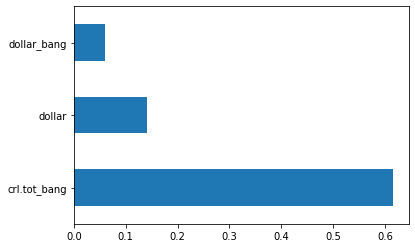

In [13]:
import matplotlib.pyplot as plt

# importances = gbc.feature_importances_
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')


Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве estimator градиетный бустинг с параметрами по дефолту и random_state=42. В параметре scoring укажите 'accuracy', n_jobs=-1, cv=5.

Сетку параметров задайте такой:
```
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
```



In [15]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
clf = GridSearchCV(GradientBoostingClassifier(random_state=random_state), param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...=None,
           

In [16]:
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1750}

В ответе укажите точность, округленную до Трёх знаков после точки разделителя, для лучших параметров на кросс-валидации. Для этого посмотрите в документации sklearn, какой атрибут GridSearchCV за это отвечает.

In [14]:
np.round(clf.best_score_, 3)

NameError: ignored

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и random_state=42. Переберите все значения max_depth от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [20]:
max_depth = np.arange(5, 16)

param_grid = {'learning_rate':[0.01], 
              'n_estimators':[1750],
              'max_depth': max_depth}
clf = GridSearchCV(GradientBoostingClassifier(random_state=random_state), param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [21]:
clf.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1750}